# k-近邻算法(kNN)概述
## k-近邻算法(kNN)的一般流程  
 - (1) 收集数据：可以使用任何方法
 - (2) 准备数据：距离计算 所需要的数值，最好是结构化的数据格式
 - (3) 分析数据：可以使用任何方法
 - (4) 训练算法：此步骤在kNN中不需要
 - (5) 测试算法：计算错误率
 - (6) 使用算法：首先要输入样本数据和结构化的输出结果，然后运行kNN算法判定输入数据分别属于哪个分类，最后运用对计算出的分类执行后续的处理

# 使用Python导入数据

In [1]:
import numpy as np
import operator

In [2]:
def createDateset():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDateset()
group,labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

In [8]:
import matplotlib.pyplot as plt

In [12]:
print(group[...,0])

[1. 1. 0. 0.]


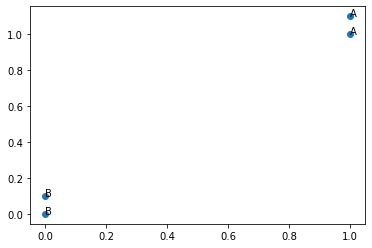

In [20]:
_x = group[...,0]
_y = group[...,1]
plt.plot(_x, _y, 'o')
# plt.annotate(labels, group[...,0], group[...,1])
for i in range(4):
    plt.text(_x[i], _y[i], labels[i])
plt.show()

## 实施kNN分类算法
# kNN算法伪代码  
对未知类别属性的数据集中的每个点依次执行以下操作
- (1) 计算已知类别数据集中的点与当前点之间的距离
- (2) 按照距离 以递增次序排序
- (3) 选取与当前点**距离最小的k个点**
- (4) 确定前k个点所在类别的出现频率
- (5) 返回前k个点出现频率最高的类别作为当前点的预测分类

In [27]:
def classify0(inX, dataSet, labels, k):
    """
    参数说明
    inX:用于分类的输入向量
    dataSet:输入的训练样本集
    labels:标签向量
    k:用于选择的最近邻居的数目
    
    return:输入向量inX的预测类别
    """
    # 计算距离    
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, [dataSetSize, 1]) - dataSet
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance**0.5
    sortedDistIndicies = distance.argsort()
    
    # 选择距离最小的k个点     
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # 排序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [28]:
print(classify0([0, 0], group, labels, 3))

B


In [29]:
print(classify0([1, 1], group, labels, 3))

A


In [30]:
print(classify0([0.5, 0.5], group, labels, 3))

B
